# Programming for Data Science and Artificial Intelligence

## Case Study - Loan Prediction

This dataset is a **classification problem**, concerning whether if the loan was approved or not.

- **Loan_ID** - unique loan ID
- **Gender** - male/female
- **Married** - yes/no
- **Dependents** - number of dependents
- **Education** - graduate/undergraduate
- **Self_Employed** - yes/no
- **ApplicantIncome** - applicant income
- **CoapplicantIncome** - coapplicant income
- **LoanAmount** - loan amount in thousands
- **Loan_Amount_Term** - term of lean in months
- **Credit_History** - credit history meets guidelines
- **Property_Area** - Urban/semi and Rural
- **Loan_Status** - approved yes/no 

We are given 2 set, the training set and the test set.

The **training set** contains 614 samples and 13 features, 12 of which are the independent variables and the last feature `Loan_Status` is the dependent variable.

The **test set** contains 367 samples with the same 12 features but without the `Loan_Status` columns. So it will be representing the unseen data that we will be implementing our model on.

## 1. Import data

In [1]:
import pandas as pd

df_train = pd.read_csv('data/train_LoanPrediction.csv')
df_test  = pd.read_csv('data/test_LoanPrediction.csv')

In [2]:
# Check the shape of Training and Test set
print('Training data shape : ', df_train.shape)
print('Test data shape     : ', df_test.shape)

Training data shape :  (614, 13)
Test data shape     :  (367, 12)


In [3]:
# Let's see the "head" of the training set
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
# describe
df_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
# Let's see the "info" of the training set
# Notice that this will tell us the  Non-null counts and the dtypes of each colum
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
### also nice to check whether this dataset is imbalanced in the beginning
df_train['Loan_Status'].value_counts(normalize=True)  #hmm..imbalanced...

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

## 2. Cleaning

### Check missing values

In [7]:
def show_missing(train_data, test_data):
    print('Missing values in Train data: \n', train_data.isna().sum())
    print("="*30)
    print('Missing values in Test data: \n', test_data.isna().sum())

In [8]:
show_missing(df_train, df_test)

Missing values in Train data: 
 Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64
Missing values in Test data: 
 Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64


### Filling categorical values


Let's first focus on the `Married` column. We can see from the table above that the `Married` has 3 missing values in the training set and 0 missing values in the test set so let's fill the training set!

We will use the distribution over the train dataset then fill in the missing values in **approximately the same ratio with fillna()**

Here are the steps:
1. Compute ratio in the **training** set
2. Divide the missing values based on ratio
3. Fill in the missing values according to the ratio

In [9]:
# count the values in 'Married' columns.
print(df_train['Married'].value_counts())

Yes    398
No     213
Name: Married, dtype: int64


In [10]:
# we can get the ratio instead
ratio = df_train['Married'].value_counts(normalize=True)
ratio

Yes    0.651391
No     0.348609
Name: Married, dtype: float64

In [11]:
ratio.index[0]
ratio.index[1]

'No'

In [12]:
ratio[0]
ratio[1]

0.3486088379705401

In [13]:
list(ratio.values)

[0.6513911620294599, 0.3486088379705401]

In [14]:
list(ratio.index)

['Yes', 'No']

In [15]:
#let's fill in!
import numpy as np

#this is a bit advanced, but it's easy technique for filling with ratios....
df_train['Married'].fillna(pd.Series(np.random.choice([ratio.index[0], ratio.index[1]], 
                        p=[ratio[0], ratio[1]], size=len(df_train))), inplace=True)

In [16]:
show_missing(df_train, df_test)

Missing values in Train data: 
 Loan_ID               0
Gender               13
Married               0
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64
Missing values in Test data: 
 Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64


But we still have other categorical columns.  For some of them we need to fill in both the training and test set!

So let's write a function that can calculate the ratio from the training data and fill the missing values accordingly.

In [17]:
#filter out all categorical columns with missing values
categorical = df_train.select_dtypes(include=['object'])
cat_with_missing = categorical.columns[categorical.isna().any()] 
cat_with_missing

Index(['Gender', 'Dependents', 'Self_Employed'], dtype='object')

In [18]:
#check missing value in these columns
show_missing(df_train[cat_with_missing], df_test[cat_with_missing])

Missing values in Train data: 
 Gender           13
Dependents       15
Self_Employed    32
dtype: int64
Missing values in Test data: 
 Gender           11
Dependents       10
Self_Employed    23
dtype: int64


In [19]:
# write a nice function to calculate ratio and fillna
def fill_data_with_ratio(train_data, test_data, column_name):
    
    ratio = train_data[column_name].value_counts(normalize=True)
    
    train_data[column_name].fillna(
        pd.Series(np.random.choice(list(ratio.index), 
        p=list(ratio.values), 
        size=len(train_data))), 
        inplace=True)
    
    test_data[column_name].fillna(
        pd.Series(np.random.choice(list(ratio.index), 
        p=list(ratio.values), 
        size=len(test_data))), 
        inplace=True)

In [20]:
# simple loop!
for col in cat_with_missing:
    fill_data_with_ratio(df_train, df_test, col)

In [21]:
show_missing(df_train[cat_with_missing], df_test[cat_with_missing])

Missing values in Train data: 
 Gender           0
Dependents       0
Self_Employed    0
dtype: int64
Missing values in Test data: 
 Gender           0
Dependents       0
Self_Employed    0
dtype: int64


### Filling "numerical" categorical values

There are two hidden categorical column but which is numerical.

In [22]:
df_train['Credit_History'].unique()

array([ 1.,  0., nan])

In [23]:
df_train['Loan_Amount_Term'].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

Thus, let's also fill them accordingly...

In [24]:
for col in ['Credit_History', 'Loan_Amount_Term']:
    fill_data_with_ratio(df_train, df_test, col)

In [25]:
show_missing(df_train, df_test)

Missing values in Train data: 
 Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64
Missing values in Test data: 
 Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           5
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64


### Filling Numerical Values

`LoanAmount` still has some missing values.

We should check the distribution of the data before deciding how to fill them.

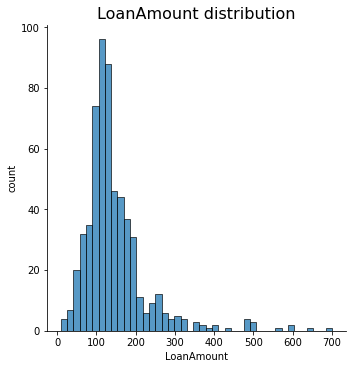

In [26]:
# plot a histogram to see the data distribution of 'LoanAmount'
import matplotlib.pyplot as plt
import seaborn as sns

sns.displot(df_train['LoanAmount'])
plt.title('LoanAmount distribution', size=16)
plt.ylabel('count')
plt.show()

<AxesSubplot:>

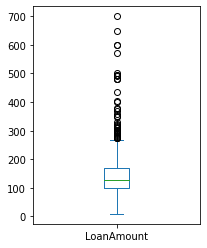

In [27]:
# also try plot a box plot
df_train['LoanAmount'].plot(kind='box', figsize=(3,4))

There are some outliers so we will be using the median over the training set to fill the missing values to avoid effects of outliers on the center value.

In [28]:
# Use the median of the Training set to fill both the training and test set.
df_train['LoanAmount'].fillna((df_train['LoanAmount'].median()), inplace=True)
df_test['LoanAmount'].fillna((df_test['LoanAmount'].median()), inplace=True)

In [29]:
show_missing(df_train, df_test)

Missing values in Train data: 
 Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64
Missing values in Test data: 
 Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64


### Filling some inconsistent column

Dependent has some weird value which is 3+, which will not allow the machine learning to work properly.  So let's replace all 3+ with 4.

In [30]:
df_train['Dependents'].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [31]:
df_test['Dependents'].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [32]:
df_train['Dependents'].replace('3+', '4', inplace = True)
df_test['Dependents'].replace('3+', '4', inplace = True)

We are finally done with filling na!

### Dropping Loan ID

We have one column which does not seem to be useful later on for our prediction, i.e., Loan ID.  So let's remove that.

In [33]:
df_train.drop(columns=['Loan_ID'], inplace=True)
df_test.drop(columns=['Loan_ID'], inplace=True)

df_train.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [34]:
# Convert values in 'Dependents' to int
df_train['Dependents'] = df_train['Dependents'].astype(int)
df_test['Dependents']  = df_test['Dependents'].astype(int)

### Label encoding

Let's start with Gender.

In [35]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_train["Gender"] = le.fit_transform(df_train["Gender"])
df_test["Gender"]  = le.transform(df_test["Gender"])

#check the mapping
le.transform(['Male', 'Female'])

array([1, 0])

There are also other categorical columns that need to be convert to integer

In [36]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    int64  
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(3), object(5)
memory usage: 57.7+ KB


In [37]:
categorical = df_train.select_dtypes(include=['object'])

Ok...now let's make one simple function that would convert everything to integer.  Note that we gonna skip those that have more than 2 categories.  I will later tell you why.

In [38]:
for col in df_train.columns:
    if(df_train[col].dtype == 'object'):
        if len(df_train[col].unique()) < 3:
            df_train[col]= df_train[col].astype('category') #first convert to category
            df_train[col] = df_train[col].cat.codes  #exploit cat.codes
        
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int8   
 2   Dependents         614 non-null    int64  
 3   Education          614 non-null    int8   
 4   Self_Employed      614 non-null    int8   
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    int8   
dtypes: float64(4), int64(3), int8(4), object(1)
memory usage: 40.9+ KB


Repeat this for test_data

In [39]:
for col in df_test.columns:
    if(df_test[col].dtype == 'object'):
        if len(df_train[col].unique()) < 3:
            df_test[col]= df_test[col].astype('category') #first convert to category
            df_test[col] = df_test[col].cat.codes  #exploit cat.codes
        
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             367 non-null    int64  
 1   Married            367 non-null    int8   
 2   Dependents         367 non-null    int64  
 3   Education          367 non-null    int8   
 4   Self_Employed      367 non-null    int8   
 5   ApplicantIncome    367 non-null    int64  
 6   CoapplicantIncome  367 non-null    int64  
 7   LoanAmount         367 non-null    float64
 8   Loan_Amount_Term   367 non-null    float64
 9   Credit_History     367 non-null    float64
 10  Property_Area      367 non-null    object 
dtypes: float64(3), int64(4), int8(3), object(1)
memory usage: 24.1+ KB


### One-hot encoding

Now we just got one more column which is property area, which has 3 categories.  

In [40]:
df_train['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

For any categorical variable of more than 2 categories, it is better to use **one-hot encoding**.  

Why?

Previously, we simply convert Gender to 0 and 1.  This is also called **label encoding**.  However, this is actually NOT recommended **for those having more than 2 category levels**, because you introduce a numeric relationship, i.e., 0 < 1 < 2, which does not make sense for categorical variables.

In fact, it is better to convert using one hot encoding.  Let's see code.

In [41]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False, drop='first') #drop='first' help remove one unnecessary column

df_train_ohe_property = pd.DataFrame(ohe.fit_transform(df_train[['Property_Area']]))
df_test_ohe_property  = pd.DataFrame(ohe.fit_transform(df_test[['Property_Area']]))

df_train_ohe_property.head()

,0,1
0,0.0,1.0
1,0.0,0.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0


In [42]:
#find out the mapping
ohe.transform(np.array([['Rural'], ['Semiurban'], ['Urban']]))

array([[0., 0.],
       [1., 0.],
       [0., 1.]])

In [43]:
# set the column name for good
df_train_ohe_property.columns = ['Semiurban', 'Urban']
df_test_ohe_property.columns = ['Semiurban', 'Urban']

In [44]:
# delete the old column before joining
df_train.drop(columns = ['Property_Area'], inplace=True)
df_test.drop(columns = ['Property_Area'], inplace=True)

In [45]:
# join the ohe table
df_train = df_train.join(df_train_ohe_property)
df_test = df_test.join(df_test_ohe_property)

df_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Semiurban,Urban
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,1,0.0,1.0
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0.0,0.0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,1,0.0,1.0
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,1,0.0,1.0
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,1,0.0,1.0


In [46]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int8   
 2   Dependents         614 non-null    int64  
 3   Education          614 non-null    int8   
 4   Self_Employed      614 non-null    int8   
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Loan_Status        614 non-null    int8   
 11  Semiurban          614 non-null    float64
 12  Urban              614 non-null    float64
dtypes: float64(6), int64(3), int8(4)
memory usage: 45.7 KB


In [47]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             367 non-null    int64  
 1   Married            367 non-null    int8   
 2   Dependents         367 non-null    int64  
 3   Education          367 non-null    int8   
 4   Self_Employed      367 non-null    int8   
 5   ApplicantIncome    367 non-null    int64  
 6   CoapplicantIncome  367 non-null    int64  
 7   LoanAmount         367 non-null    float64
 8   Loan_Amount_Term   367 non-null    float64
 9   Credit_History     367 non-null    float64
 10  Semiurban          367 non-null    float64
 11  Urban              367 non-null    float64
dtypes: float64(5), int64(4), int8(3)
memory usage: 27.0 KB


## 3. Exploratory Data Analysis

Last time we used correlation matrix and predictive score.  However, both are not so useful in classification problem.  Instead, we shall use boxplot to quickly plot relationship between variables.

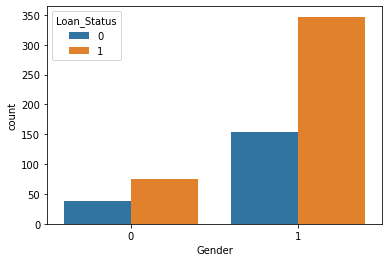

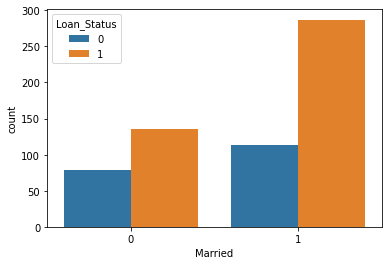

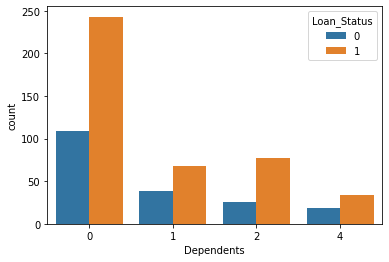

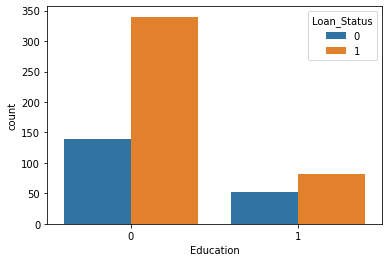

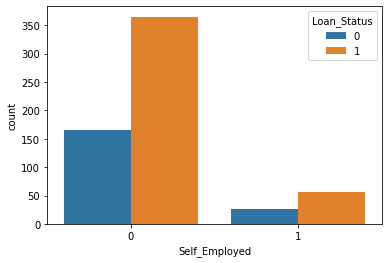

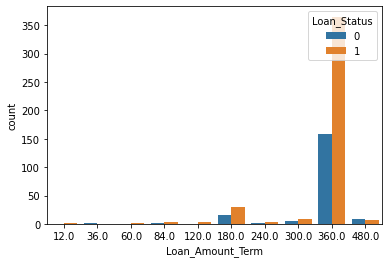

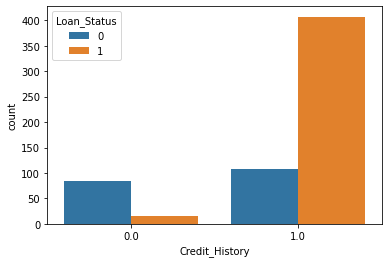

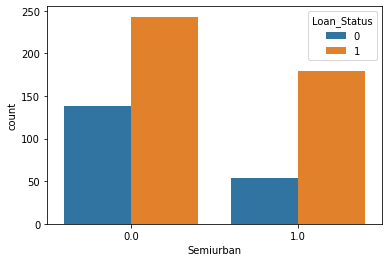

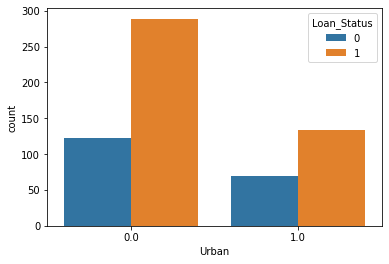

In [48]:
categorical = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Semiurban', 'Urban']

for col in categorical:
    sns.countplot(x=col,data=df_train,hue='Loan_Status')
    plt.show()

What we learn:
    
1. Male are more likely to get loans
2. Married people are more likely to get loans
3. No dependents are more likely to get loans
4. Graduates are more likely to get loans
5. Not self-employed is more likely to get loans
6. Majority of loans are 360 months
7. People with credit history are more likely to get loans
8. Semiurban and urban people are more likely to get loans

Let's also look at numerical column.

In [49]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int8   
 2   Dependents         614 non-null    int64  
 3   Education          614 non-null    int8   
 4   Self_Employed      614 non-null    int8   
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Loan_Status        614 non-null    int8   
 11  Semiurban          614 non-null    float64
 12  Urban              614 non-null    float64
dtypes: float64(6), int64(3), int8(4)
memory usage: 45.7 KB


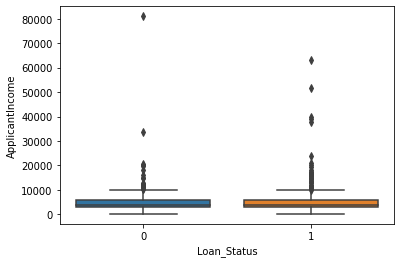

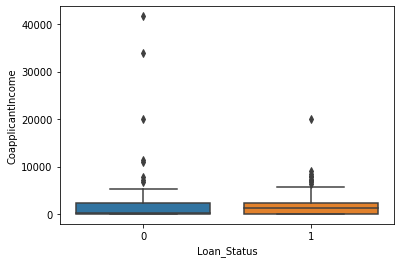

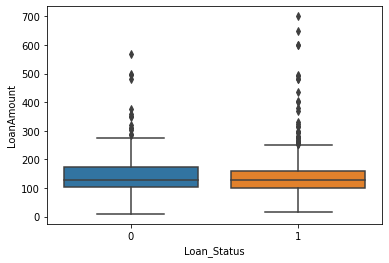

In [50]:
numerical = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

for col in numerical:
    sns.boxplot(y=col,data=df_train,x='Loan_Status')
    plt.show()

It's clear that numerical columns have little relationship....

## 4) Modeling

Before we can do modeling, let's change everything to int

### Setting X and y

Let's set X and y.  For X, we shall drop Loan_Status, and all numeric data based on our box plot analysis (for now, we not gonna trust the ppsscore).  For y, it is Loan_Status

In [51]:
X_train = df_train.drop(columns=['LoanAmount', 'ApplicantIncome', 'CoapplicantIncome', 'Loan_Status'])
y_train = df_train['Loan_Status']

In [52]:
X_test  = df_test.drop(columns=numerical)
#note that our test set has no loan_status because this is what we have...

### Scaling

In [53]:
# split X and y into X_train, X_val, y_train, y_val
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test  = sc.transform(X_test)

### Train a classification model

In [54]:
from sklearn.linear_model import LogisticRegression as lr
from sklearn.tree import DecisionTreeClassifier as dt
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.ensemble import RandomForestClassifier as rf
from sklearn.svm import SVC as sv

from sklearn.metrics import classification_report

# models that we will be using, put them in a list
algorithms = [lr(), dt(), knn(), rf(), sv()]

# The names of the models
algorithm_names = ["Logistic Regression", "Decision Tree", "KNeighbors", "Random-Forest Regressor", "Support Vector Machine"]

Let's do some simple cross-validation here....(note that you can also do nested cv here...but I am too lazy)

In [55]:
from sklearn.model_selection import KFold, cross_val_score

#lists for keeping mse
train_mse = []
test_mse = []

#defining splits
kfold = KFold(n_splits=5, shuffle=True)

for i, model in enumerate(algorithms):
    scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    print(f"{algorithm_names[i]} - Score: {scores}; Mean: {scores.mean()}")

Logistic Regression - Score: [0.80487805 0.85365854 0.78861789 0.7804878  0.77868852]; Mean: 0.8012661602025857
Decision Tree - Score: [0.73170732 0.7398374  0.69918699 0.69105691 0.7295082 ]; Mean: 0.7182593629214982
KNeighbors - Score: [0.7804878  0.75609756 0.78861789 0.80487805 0.7704918 ]; Mean: 0.7801146208183394
Random-Forest Regressor - Score: [0.80487805 0.77235772 0.76422764 0.75609756 0.77868852]; Mean: 0.7752499000399841
Support Vector Machine - Score: [0.74796748 0.82113821 0.82113821 0.81300813 0.78688525]; Mean: 0.7980274556843929


### Grid Search

In [56]:
from sklearn.model_selection import GridSearchCV

model = lr()

param_grid = dict()
param_grid['solver'] = ['newton-cg', 'lbfgs', 'liblinear']

grid = GridSearchCV(model, param_grid, cv=kfold, refit=True, scoring='f1_macro')
grid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='f1_macro')

In [57]:
grid.best_params_

{'solver': 'newton-cg'}

In [58]:
# Find your grid_search's best score
best_accuracy = grid.best_score_

In [59]:
best_accuracy

0.721532355739299

### Feature Importance

Unfortunately, Logistic Regression by sklearn does not provide feature importance, thus we cannot use <code>Shap</code>.  Since we also don't have y_test, we also cannot use permutation technique.

The good news is that computing feature importance of logistic regression is simple, i.e., based on its weights on the feature.  The bigger weight on that feature indicates higher importance.

In [60]:
#obtain the weights
model = grid.best_estimator_
weights = model.coef_

weights[0]

array([ 1.13800278e-02,  2.29696340e-01,  9.91074508e-03, -1.22737369e-01,
       -8.59256479e-05, -2.90822627e-02,  1.14871874e+00,  4.31551107e-01,
        1.04487744e-01])

In [61]:
#obtain column name
our_df = df_train.drop(columns=['LoanAmount', 'ApplicantIncome', 'CoapplicantIncome', 'Loan_Status'])
column_names = our_df.columns
column_names

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Loan_Amount_Term', 'Credit_History', 'Semiurban', 'Urban'],
      dtype='object')

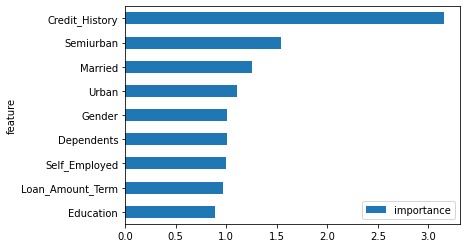

In [62]:
import math

feature_importance = pd.DataFrame(column_names, columns = ["feature"])
feature_importance["importance"] = pow(math.e, weights[0])
feature_importance = feature_importance.sort_values(by = ["importance"], ascending=True)

ax = feature_importance.plot.barh(x='feature', y='importance')
plt.show()

**Very important note**: before using technique, make sure to use <code>StandardScaler()</code> first to put everything in same scale, if not, your feature importance would give wrong results.  Luckily, we have done this as common practice throughout the course.

### Inference

In [63]:
yhat = grid.predict(X_test)
print(yhat)  #submit this to kaggle

[1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1
 1 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1
 0 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1]


### Inference using probability

Sometimes, your production requires you to output probabilities, instead of exact class, which is more liberal.  Most classification algorithm has a function <code>predict_proba</code>.

In [64]:
yhat = grid.predict_proba(X_test)
print(yhat)

[[0.19439568 0.80560432]
 [0.19313004 0.80686996]
 [0.19187067 0.80812933]
 [0.19187067 0.80812933]
 [0.34468011 0.65531989]
 [0.24521488 0.75478512]
 [0.21616117 0.78383883]
 [0.89958642 0.10041358]
 [0.18377672 0.81622328]
 [0.21257989 0.78742011]
 [0.34468011 0.65531989]
 [0.10941446 0.89058554]
 [0.25890646 0.74109354]
 [0.73226912 0.26773088]
 [0.17118885 0.82881115]
 [0.27933632 0.72066368]
 [0.19187067 0.80812933]
 [0.10706848 0.89293152]
 [0.19439568 0.80560432]
 [0.1562775  0.8437225 ]
 [0.24367216 0.75632784]
 [0.32626083 0.67373917]
 [0.28097018 0.71902982]
 [0.35134322 0.64865678]
 [0.19439568 0.80560432]
 [0.91634842 0.08365158]
 [0.19187067 0.80812933]
 [0.19439568 0.80560432]
 [0.73543385 0.26456615]
 [0.26517292 0.73482708]
 [0.21753704 0.78246296]
 [0.19187067 0.80812933]
 [0.16706237 0.83293763]
 [0.19439568 0.80560432]
 [0.19439568 0.80560432]
 [0.8182316  0.1817684 ]
 [0.17983005 0.82016995]
 [0.19443504 0.80556496]
 [0.28102095 0.71897905]
 [0.28097018 0.71902982]


### Save model for deployment

In [65]:
import pickle

# save the model to disk
filename = 'model/loan.model'
pickle.dump(grid, open(filename, 'wb'))

### Loading model

In [66]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
yhat = loaded_model.predict(X_test)